### What is Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/about/index.html

## Importing Pandas

In [29]:
import pandas as pd
import numpy as np

## Pandas Series
A Pandas Series is like a column in a table. It is a 1-D array holding data of any type. Since we did not specify an index for the data, a
default one consisting of the integers 0 through N - 1 (where N is the length of the data) is created.

### Series from lists

In [30]:
# string datatype
countries = ['India', 'Nepal', 'Bhutan', 'Russia']

c = pd.Series(countries)
c

0     India
1     Nepal
2    Bhutan
3    Russia
dtype: object

In [31]:
# numeric datatype
runs = [87, 69, 92, 79, 84]

runs_ser = pd.Series(runs)
runs_ser

0    87
1    69
2    92
3    79
4    84
dtype: int64

ser.array returns numpy array containing all the values.

In [32]:
runs_ser.array

<NumpyExtensionArray>
[87, 69, 92, 79, 84]
Length: 5, dtype: int64

In [33]:
runs_ser.index

RangeIndex(start=0, stop=5, step=1)

### Series with custom indexing
- We can create series with custom indexing but the size should be equal.

In [34]:
marks = [89, 78, 93, 91]
subjcets = ['maths', 'english', 'science', 'hindi']

marks_subjects = pd.Series(marks, index=subjcets)
marks_subjects

maths      89
english    78
science    93
hindi      91
dtype: int64

### Naming the Series

In [35]:
# Dictionary
marks_dict = {
    'maths':84,
    'english':57,
    'science':89,
    'hindi':97
}

marks = pd.Series(marks_dict, name='Dilkhush\'s marks')
marks

maths      84
english    57
science    89
hindi      97
Name: Dilkhush's marks, dtype: int64

## Series Attributes

### ser.size
- returns total number of non-Nan values in the series.

In [36]:
marks

maths      84
english    57
science    89
hindi      97
Name: Dilkhush's marks, dtype: int64

In [37]:
marks.size

4

### ser.dtype
- returns the datatype of series
- datatype of series can be altered during creation.

In [38]:
marks.dtype

dtype('int64')

In [39]:
marks = pd.Series(marks_dict, name='Dilkhush\'s Marks', dtype=int)

In [40]:
marks.dtype

dtype('int32')

In [41]:
temp = pd.Series([1, 2, "Hello", 4.3])

In [42]:
temp.dtype

dtype('O')

In [43]:
print(type(temp[0]))
print(type(temp[1]))
print(type(temp[2]))
print(type(temp[3]))

<class 'int'>
<class 'int'>
<class 'str'>
<class 'float'>


`Note` - NumPy Array contains values of one data type but Pandas series can contain values of different datatypes.

### ser.name
- returns name of series

In [44]:
marks.name

"Dilkhush's Marks"

In [45]:
temp.name

### ser.index
- if the name of the index follows the python rules for variable naming then we can extract the values using ser.index

In [46]:
marks_subjects

maths      89
english    78
science    93
hindi      91
dtype: int64

In [47]:
marks_subjects.maths

89

### ser.index
- return Index object containing indices of series in case of indexes are strings,
- if indices are numbers, RangeIndex is returned

In [48]:
marks.index

Index(['maths', 'english', 'science', 'hindi'], dtype='object')

In [49]:
temp.index

RangeIndex(start=0, stop=4, step=1)

### ser.values
- returns ndarray containing values

In [50]:
marks.values

array([84, 57, 89, 97])

## Reading Data
- We can read data using pandas inbuilt function, read_csv()
- read_csv() by default create DataFrame object, we can transform it into Series using squeeze function

Text and binary data loading functions in pandas
| Function         | Description                                                                                             |
|------------------|---------------------------------------------------------------------------------------------------------|
| read_csv         | Load delimited data from a file, URL, or file-like object; use comma as default delimiter                |
| read_fwf         | Read data in fixed-width column format (i.e., no delimiters)                                             |
| read_clipboard   | Variation of read_csv that reads data from the clipboard; useful for converting tables from web pages    |
| read_excel       | Read tabular data from an Excel XLS or XLSX file                                                         |
| read_hdf         | Read HDF5 files written by pandas                                                                        |
| read_html        | Read all tables found in the given HTML document                                                         |
| read_json        | Read data from a JSON (JavaScript Object Notation) string representation, file, URL, or file-like object |
| read_feather     | Read the Feather binary file format                                                                      |
| read_orc         | Read the Apache ORC binary file format                                                                   |
| read_parquet     | Read the Apache Parquet binary file format                                                               |
| read_pickle      | Read an object stored by pandas using the Python pickle format                                           |
| read_sas         | Read a SAS dataset stored in one of the SAS system’s custom storage formats                              |
| read_spss        | Read a data file created by SPSS                                                                         |
| read_sql         | Read the results of a SQL query (using SQLAlchemy)                                                       |
| read_sql_table   | Read a whole SQL table (using SQLAlchemy); equivalent to using a query that selects everything in that table using read_sql |
| read_stata       | Read a dataset from Stata file format                                                                    |
| read_xml         | Read a table of data from an XML file                                                                    |


In [51]:
subs = pd.read_csv('subs.csv')
type(subs)

pandas.core.frame.DataFrame

`Note` - pd.read_csv() directly reads the data into DataFrame but on that squeeze() function can be used to convert to Series

In [52]:
subs = subs.squeeze()

In [53]:
type(subs)

pandas.core.series.Series

In [54]:
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [55]:
vk = pd.read_csv('kohli_ipl.csv', index_col='match_no', dtype=int)
vk = vk.squeeze()
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int32

In [56]:
movies = pd.read_csv('bollywood.csv', index_col='movie')
movies = movies.squeeze()
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

## Series Methods

### ser.head(n) or ser.tail(n)
- Return top or bottom n values from the series
- if n is not provided then by default n is 5

In [57]:
subs.head()

0    48
1    57
2    40
3    43
4    44
Name: Subscribers gained, dtype: int64

In [58]:
vk.head(3)

match_no
1     1
2    23
3    13
Name: runs, dtype: int32

In [59]:
movies.tail(4)

movie
Aankhen (2002 film)     Amitabh Bachchan
Saathiya (film)             Vivek Oberoi
Company (film)                Ajay Devgn
Awara Paagal Deewana        Akshay Kumar
Name: lead, dtype: object

### ser.sample(n)
- returns randomly sampled n values.
- by default n is 1

In [60]:
movies.sample()

movie
Dhadak    Ishaan Khattar
Name: lead, dtype: object

In [61]:
movies.sample(3)

movie
Mad About Dance      Saahil Prem
Hotel Salvation     Adil Hussain
Why Cheat India    Emraan Hashmi
Name: lead, dtype: object

### ser.value_counts()
- returns series of count of values

In [62]:
movies.value_counts()

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
                    ..
Diganth              1
Parveen Kaur         1
Seema Azmi           1
Akanksha Puri        1
Edwin Fernandes      1
Name: count, Length: 566, dtype: int64

In [63]:
vk.value_counts()

runs
0     9
1     8
12    8
9     7
35    6
     ..
36    1
45    1
71    1
37    1
53    1
Name: count, Length: 78, dtype: int64

### ser.sort_values(ascending = True, inplace = False)
- return sorted array on the basis of values.
- no change into original series.
- by default sort in ascencing order
- inplace is used to make permanent changes into original series

In [64]:
vk.sort_values(ascending=False)

match_no
128    113
126    109
123    108
164    100
120    100
      ... 
93       0
211      0
130      0
8        0
135      0
Name: runs, Length: 215, dtype: int32

In [65]:
movies.sort_values() # Alphabetically in case of string

movie
Qaidi Band                            Aadar Jain
Roar: Tigers of the Sundarbans      Aadil Chahal
Lipstick Under My Burkha            Aahana Kumra
Raat Gayi Baat Gayi?                Aamir Bashir
Talaash: The Answer Lies Within       Aamir Khan
                                        ...     
Dil Toh Deewana Hai                  Zeenat Aman
Sallu Ki Shaadi                      Zeenat Aman
Strings of Passion                   Zeenat Aman
Dunno Y... Na Jaane Kyon             Zeenat Aman
Taj Mahal: An Eternal Love Story     Zulfi Sayed
Name: lead, Length: 1500, dtype: object

### ser.sort_index(ascending = True, inplace = False)
- works same as sort_values() but on index
- inplace parameter is used for making permanent changes into series

In [66]:
movies.sort_index()

movie
1920 (film)                   Rajniesh Duggall
1920: London                     Sharman Joshi
1920: The Evil Returns             Vicky Ahuja
1971 (2007 film)                Manoj Bajpayee
2 States (2014 film)              Arjun Kapoor
                                   ...        
Zindagi 50-50                      Veena Malik
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi Tere Naam           Mithun Chakraborty
Zokkomon                       Darsheel Safary
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Name: lead, Length: 1500, dtype: object

## Mathematical Operations on Series

### ser.count()
`Note` - count - only count all the values excluding missing values while size counts all


In [67]:
vk.count() # total matches played by vk

215

### ser.sum()
- sum of all elements of series

In [68]:
subs.sum() # total subscriber gained in last 365 days

49510

### ser.product()
- product of all elements of the series

In [69]:
vk.prod()

0

In [70]:
vk.product()

0

### ser.mean()/median()/mode()/std()/var()
- apply stastical operations on series

In [71]:
subs.mean() # average subscribers gain every day

135.64383561643837

In [72]:
vk.median() # median score

24.0

In [73]:
movies.mode() # frequent lead in movies

0    Akshay Kumar
Name: lead, dtype: object

In [74]:
subs.std()

62.6750230372527

In [75]:
vk.var()

688.0024777222343

### ser.min()/max()
- returns minimum or maximum element from the series

In [76]:
subs.max()

396

In [77]:
vk.min()

0

### ser.describe()
- return series containing count, mean, std, min, 25%, 50%, 75% and max

In [78]:
subs.describe()

count    365.000000
mean     135.643836
std       62.675023
min       33.000000
25%       88.000000
50%      123.000000
75%      177.000000
max      396.000000
Name: Subscribers gained, dtype: float64

## Indexing
- Values can be fetched using positional indexing or keyword indexing.
- Negative indexing only works if data type of index is string(object)

In [79]:
x = pd.Series([12,13,14,35,46,57,58,79,9])
x

0    12
1    13
2    14
3    35
4    46
5    57
6    58
7    79
8     9
dtype: int64

In [80]:
x[0]

12

In [81]:
x[-1]

KeyError: -1

In [ ]:
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [ ]:
movies.iloc[-1]

'Akshay Kumar'

In [ ]:
movies['Awara Paagal Deewana']

'Akshay Kumar'

### Fancy Indexing

In [ ]:
vk[[1,3,4,5]] # Scores of 1st, 3rd, 4th and 5th matches

match_no
1     1
3    13
4    12
5     1
Name: runs, dtype: int32

## Slicing
- negative indexing can be used for slicing

In [ ]:
vk[5:16]

match_no
6      9
7     34
8      0
9     21
10     3
11    10
12    38
13     3
14    11
15    50
16     2
Name: runs, dtype: int32

In [ ]:
vk[-5:]

match_no
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int32

In [ ]:
movies[::2] # Alternet movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
The Accidental Prime Minister (film)         Anupam Kher
Evening Shadows                         Mona Ambegaonkar
Fraud Saiyaan                               Arshad Warsi
Manikarnika: The Queen of Jhansi          Kangana Ranaut
                                              ...       
Raaz (2002 film)                              Dino Morea
Waisa Bhi Hota Hai Part II                  Arshad Warsi
Kaante                                  Amitabh Bachchan
Aankhen (2002 film)                     Amitabh Bachchan
Company (film)                                Ajay Devgn
Name: lead, Length: 750, dtype: object

## Editing Series

In [ ]:
marks

maths      84
english    57
science    89
hindi      97
Name: Dilkhush's Marks, dtype: int32

In [ ]:
marks.iloc[1] = 100

In [ ]:
marks

maths       84
english    100
science     89
hindi       97
Name: Dilkhush's Marks, dtype: int32

In [ ]:
# What if an index does not exist
marks['sst'] = 87

In [ ]:
marks

maths       84
english    100
science     89
hindi       97
sst         87
Name: Dilkhush's Marks, dtype: int32

In [ ]:
# Slicing
runs_ser

0    87
1    69
2    92
3    79
4    84
dtype: int64

In [ ]:
runs_ser[2:4] = 100

In [ ]:
runs_ser

0     87
1     69
2    100
3    100
4     84
dtype: int64

In [ ]:
# Fancy indexing
runs_ser[[0, 3, 4]] = 50
runs_ser

0     50
1     69
2    100
3     50
4     50
dtype: int64

In [ ]:
runs_ser[[0, 3, 4]] = [0, 25, 40]
runs_ser

0      0
1     69
2    100
3     25
4     40
dtype: int64

In [ ]:
# using index label
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [ ]:
movies['2 States (2014 film)'] = 'Alia Bhatt'
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

## Python functionalities on Series objects

In [ ]:
# len/type/dir/sorted/max/min

len(subs)

365

In [ ]:
type(subs)

pandas.core.series.Series

In [ ]:
dir(vk)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__

In [ ]:
sorted(subs)

[33,
 33,
 35,
 37,
 39,
 40,
 40,
 40,
 40,
 42,
 42,
 43,
 44,
 44,
 44,
 45,
 46,
 46,
 48,
 49,
 49,
 49,
 49,
 50,
 50,
 50,
 51,
 54,
 56,
 56,
 56,
 56,
 57,
 61,
 62,
 64,
 65,
 65,
 66,
 66,
 66,
 66,
 67,
 68,
 70,
 70,
 70,
 71,
 71,
 72,
 72,
 72,
 72,
 72,
 73,
 74,
 74,
 75,
 76,
 76,
 76,
 76,
 77,
 77,
 78,
 78,
 78,
 79,
 79,
 80,
 80,
 80,
 81,
 81,
 82,
 82,
 83,
 83,
 83,
 84,
 84,
 84,
 85,
 86,
 86,
 86,
 87,
 87,
 87,
 87,
 88,
 88,
 88,
 88,
 88,
 89,
 89,
 89,
 90,
 90,
 90,
 90,
 91,
 92,
 92,
 92,
 93,
 93,
 93,
 93,
 95,
 95,
 96,
 96,
 96,
 96,
 97,
 97,
 98,
 98,
 99,
 99,
 100,
 100,
 100,
 101,
 101,
 101,
 102,
 102,
 103,
 103,
 104,
 104,
 104,
 105,
 105,
 105,
 105,
 105,
 105,
 105,
 105,
 105,
 108,
 108,
 108,
 108,
 108,
 108,
 109,
 109,
 110,
 110,
 110,
 111,
 111,
 112,
 113,
 113,
 113,
 114,
 114,
 114,
 114,
 115,
 115,
 115,
 115,
 117,
 117,
 117,
 118,
 118,
 119,
 119,
 119,
 119,
 120,
 122,
 123,
 123,
 123,
 123,
 123,
 124,
 125,


In [ ]:
min(subs)

33

In [ ]:
max(subs)

396

In [ ]:
# type conversion
list(marks)

[84, 100, 89, 97, 87]

In [ ]:
dict(marks)

{'maths': 84, 'english': 100, 'science': 89, 'hindi': 97, 'sst': 87}

In [ ]:
# membership operator

'2 States (2014 film)' in movies # checks index values

True

In [ ]:
'Alia Bhatt' in movies.values

True

In [ ]:
# Looping
for i in movies: # returns values
    print(i)

Vicky Kaushal
Vicky Ahuja
Anupam Kher
Emraan Hashmi
Mona Ambegaonkar
Geetika Vidya Ohlyan
Arshad Warsi
Radhika Apte
Kangana Ranaut
Nawazuddin Siddiqui
Ali Asgar
Ranveer Singh
Prit Kamani
Ajay Devgn
Sushant Singh Rajput
Amitabh Bachchan
Abhimanyu Dasani
Talha Arshad Reshi
Nawazuddin Siddiqui
Garima Agarwal
Rasika Agashe
Barun Sobti
Akshay Kumar
Zaheer Iqbal
Vidyut Jammwal
Deepika Amin
Manav Kaul
Naseeruddin Shah
Varun Dhawan
Shreyas Talpade
Tiger Shroff
Boman Irani
Ajay Devgn
Arjun Kapoor
Gavie Chahal
Prabhu Deva
Shahid Kapoor
Ayushmann Khurrana
Anupam Kher
Karanvir Bohra
Hrithik Roshan
Jimmy Sheirgill
John Abraham
Rishi Kapoor
Kangana Ranaut
Natalia Janoszek
Diljit Dosanjh
Sidharth Malhotra
Rajeev Khandelwal
Zaira Wasim
Akshay Kumar
Jacqueline Fernandez
Ayushmann Khurrana
Akshaye Khanna
Sonam Kapoor
Karan Deol
Sanjay Dutt
Bhavesh Kumar
Sanaya Irani
Ayushmann Khurrana
Siddhanth Kapoor
Akshay Kumar
Taapsee Pannu
Rajkummar Rao
Sunny Singh Nijjar
Neil Nitin Mukesh
Suraj Pancholi
Boman Iran

In [ ]:
for i in movies.index: # for accessing index we have to use movies.index
    print(i) 

Uri: The Surgical Strike
Battalion 609
The Accidental Prime Minister (film)
Why Cheat India
Evening Shadows
Soni (film)
Fraud Saiyaan
Bombairiya
Manikarnika: The Queen of Jhansi
Thackeray (film)
Amavas
Gully Boy
Hum Chaar
Total Dhamaal
Sonchiriya
Badla (2019 film)
Mard Ko Dard Nahi Hota
Hamid (film)
Photograph (film)
Risknamaa
Mere Pyare Prime Minister
22 Yards
Kesari (film)
Notebook (2019 film)
Junglee (2019 film)
Gone Kesh
Albert Pinto Ko Gussa Kyun Aata Hai?
The Tashkent Files
Kalank
Setters (film)
Student of the Year 2
PM Narendra Modi
De De Pyaar De
India's Most Wanted (film)
Yeh Hai India
Khamoshi (2019 film)
Kabir Singh
Article 15 (film)
One Day: Justice Delivered
Hume Tumse Pyaar Kitna
Super 30 (film)
Family of Thakurganj
Batla House
Jhootha Kahin Ka
Judgementall Hai Kya
Chicken Curry Law
Arjun Patiala
Jabariya Jodi
Pranaam
The Sky Is Pink
Mission Mangal
Saaho
Dream Girl (2019 film)
Section 375
The Zoya Factor (film)
Pal Pal Dil Ke Paas
Prassthanam
P Se Pyaar F Se Faraar
Ghost 

In [ ]:
# Arithmetic Operators

100 - marks

maths      16
english     0
science    11
hindi       3
sst        13
Name: Dilkhush's Marks, dtype: int32

In [ ]:
# Relational Operators

vk[vk>50]

match_no
34      58
41      71
44      56
45      67
52      70
57      57
68      73
71      51
73      58
74      65
80      57
81      93
82      99
85      56
97      67
99      73
103     51
104     62
110     82
116     75
117     79
119     80
120    100
122     52
123    108
126    109
127     75
128    113
129     54
131     54
132     62
134     64
137     55
141     58
144     57
145     92
148     68
152     70
160     84
162     67
164    100
175     72
178     90
188     72
197     51
198     53
209     58
213     73
Name: runs, dtype: int32

## Boolean Indexing on Series

In [ ]:
# Find 50's and 100's scored by kohli

vk[(vk==50) | (vk==100)]

match_no
15      50
120    100
164    100
182     50
Name: runs, dtype: int32

In [ ]:
# find number of ducks
vk[vk==0].size

9

In [ ]:
# count no of days when subscriber gain is more than 200 
subs[subs>200].size

59

In [ ]:
# find actors who have done more than 20 movies
num_movies = movies.value_counts()
num_movies[num_movies>20]

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Shah Rukh Khan      22
Emraan Hashmi       21
Name: count, dtype: int64

## Plotting Graphs on Series

<Axes: >

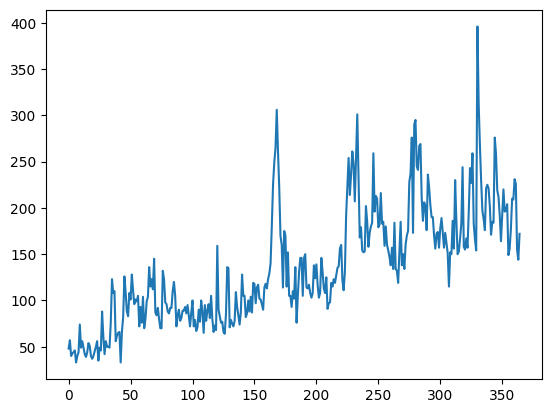

In [ ]:
subs.plot()

<Axes: xlabel='lead'>

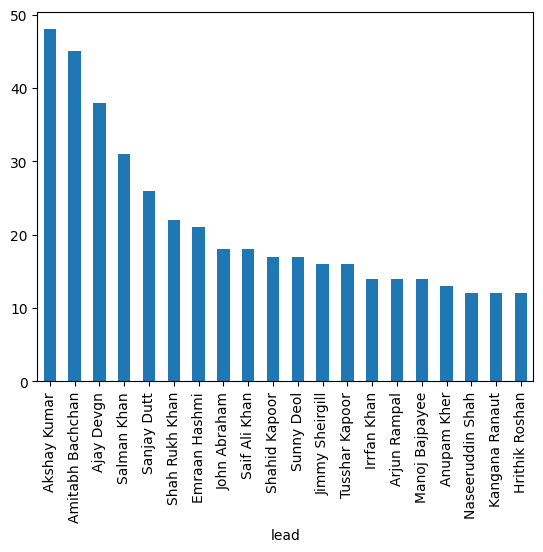

In [ ]:
movies.value_counts().head(20).plot(kind='bar')

<Axes: ylabel='count'>

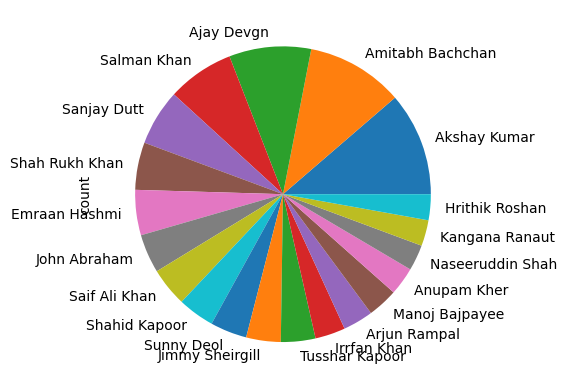

In [ ]:
movies.value_counts().head(20).plot(kind='pie')

## Important series methods

### ser.astype('new_datatype')
- Change the datatype of series.
- no permanent changes.

In [ ]:
import sys
sys.getsizeof(vk)

8000

In [ ]:
sys.getsizeof(vk.astype('int16'))

7570

### ser.between(start, end)
- returns boolean series including start and end.

In [ ]:
vk[vk.between(51, 99)]

match_no
34     58
41     71
44     56
45     67
52     70
57     57
68     73
71     51
73     58
74     65
80     57
81     93
82     99
85     56
97     67
99     73
103    51
104    62
110    82
116    75
117    79
119    80
122    52
127    75
129    54
131    54
132    62
134    64
137    55
141    58
144    57
145    92
148    68
152    70
160    84
162    67
175    72
178    90
188    72
197    51
198    53
209    58
213    73
Name: runs, dtype: int32

### ser.clip
- returns a series in which all the values are clipped in the given range.
- no change in original series

In [ ]:
subs.clip(100, 200)

0      100
1      100
2      100
3      100
4      100
      ... 
360    200
361    200
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

### series.drop_duplicates(keep='first')
- return a series in which duplicated values are dropped.
- keep parameter decides which occurence to be included into series.
- by default it keeps first occurence.

In [ ]:
temp = pd.Series([1,1,2,2,3,3,4,4])
temp

0    1
1    1
2    2
3    2
4    3
5    3
6    4
7    4
dtype: int64

In [ ]:
temp.drop_duplicates()

0    1
2    2
4    3
6    4
dtype: int64

In [ ]:
temp.drop_duplicates(keep='last')

1    1
3    2
5    3
7    4
dtype: int64

### ser.duplicated()
- returns a boolean series, if values is duplicated it is true.

In [ ]:
temp.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
dtype: bool

In [ ]:
temp.duplicated().sum()

4

### ser.size
- returns total values in the series

### ser.count()
- returns total not-NaN values 

In [ ]:
temp = pd.Series([1,2,3,np.nan,5,6,np.nan,8,np.nan,10])
temp

0     1.0
1     2.0
2     3.0
3     NaN
4     5.0
5     6.0
6     NaN
7     8.0
8     NaN
9    10.0
dtype: float64

In [ ]:
temp.size

10

In [ ]:
temp.count()

7

### ser.isnull()
- returns a boolean series in which every element is checked whether is it null or not

In [ ]:
temp.isnull().sum()

3

### ser.dropna()
- returns a series after dropping all the Nan values.

In [ ]:
temp.dropna()

0     1.0
1     2.0
2     3.0
4     5.0
5     6.0
7     8.0
9    10.0
dtype: float64

### ser.fillna()
- returns a series in which NaN values are filled using some conditions

In [ ]:
temp.fillna(0)

0     1.0
1     2.0
2     3.0
3     0.0
4     5.0
5     6.0
6     0.0
7     8.0
8     0.0
9    10.0
dtype: float64

In [ ]:
temp.fillna(temp.mean())

0     1.0
1     2.0
2     3.0
3     5.0
4     5.0
5     6.0
6     5.0
7     8.0
8     5.0
9    10.0
dtype: float64

### ser.isin(list_of_items)
- returns a boolean series which checks the elements of provided list are in the series or not

In [ ]:
vk[vk.isin([49, 99])]

match_no
82    99
86    49
Name: runs, dtype: int32

### ser.apply(func)
- returns series after applying the given function on all the values.

In [ ]:
movies.apply(lambda x: x.split()[0].upper())

movie
Uri: The Surgical Strike                  VICKY
Battalion 609                             VICKY
The Accidental Prime Minister (film)     ANUPAM
Why Cheat India                          EMRAAN
Evening Shadows                            MONA
                                         ...   
Hum Tumhare Hain Sanam                     SHAH
Aankhen (2002 film)                     AMITABH
Saathiya (film)                           VIVEK
Company (film)                             AJAY
Awara Paagal Deewana                     AKSHAY
Name: lead, Length: 1500, dtype: object

In [ ]:
subs.apply(lambda x:'good day' if x>subs.mean() else 'bad day')

0       bad day
1       bad day
2       bad day
3       bad day
4       bad day
         ...   
360    good day
361    good day
362    good day
363    good day
364    good day
Name: Subscribers gained, Length: 365, dtype: object

### ser.copy()
- copy the series

In [ ]:
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int32

In [ ]:
new = vk.head()
new

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int32

In [ ]:
new[1] = 100
new

match_no
1    100
2     23
3     13
4     12
5      1
Name: runs, dtype: int32

In [ ]:
vk

match_no
1      100
2       23
3       13
4       12
5        1
      ... 
211      0
212     20
213     73
214     25
215      7
Name: runs, Length: 215, dtype: int32

In [ ]:
new = vk.head().copy()
new

match_no
1    100
2     23
3     13
4     12
5      1
Name: runs, dtype: int32

In [ ]:
new[1] = 1
new

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int32

In [ ]:
vk

match_no
1      100
2       23
3       13
4       12
5        1
      ... 
211      0
212     20
213     73
214     25
215      7
Name: runs, Length: 215, dtype: int32